The goal of this project is to create a machine learning model that can predict the sanitary quality of food establishments in France. This model can be used by developers to create applications that provide citizens and authorities responsible for sanitary control with an idea about the potential quality of food establishments.


In [1]:
pip install chardet

In [2]:
#Libraries
import chardet #for reading file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_info_columns", 100)

In [3]:
train = pd.read_csv("C:/Users/Source/OneDrive - IESEG/Desktop/SEM 2/SML/Kaggle/Datasets/food_safety_train.csv", encoding='iso-8859-1')
test = pd.read_csv("C:/Users/Source/OneDrive - IESEG/Desktop/SEM 2/SML/Kaggle/Datasets/food_safety_test.csv", encoding='iso-8859-1')
test_id = test[['trustii_id']]; test = test.drop('trustii_id', axis=1)  # Store the test id separately

# Combine train, test
data = pd.concat([train, test], axis=0, ignore_index=True)
print("Data shape:", data.shape)

Data shape: (31510, 14)


In [4]:
train.head()

,trustii_id,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Agrement,geores,filtre,ods_type_activite,Synthese_eval_sanit
0,10000,SAVEURS ASIATIQUES,50846842800034,RUE DES FRERES LUMIERE,33130,Bègles,23-110093-1,2024-02-05T01:00:00+01:00,Restaurant,NaN,44.797031_-0.535231,Restaurant,Autres,Satisfaisant
1,10001,EPICERIE ROND POINT,90472398800013,48 AV DU ROND POINT,93250,Villemomble,23-056603-1,2023-07-17T02:00:00+02:00,Libre service|Alimentation générale,NaN,48.884745_2.499984,Libre service|Alimentation générale,Autres,Satisfaisant
2,10002,AUBERGE DES OLIVIERS,48792443300013,ROUTE DE LA CANONICA,20290,Lucciana,23-018114-1,2023-03-08T01:00:00+01:00,Restaurant,NaN,42.541715_9.46286,Restaurant,Autres,Très satisfaisant
3,10003,LES HUITRES DES FLOTS,80481822700022,RUE DU PONT DES BERNES,50550,Saint-Vaast-la-Hougue,23-011747-1,2023-02-15T01:00:00+01:00,Purification/Expédition de coquillages,50562016,49.592002_-1.28678,NaN,Produits de la mer et d'eau douce,Satisfaisant
4,10004,COLONNA DOMINIQUE-ANTOINE,53444598600019,Partinello,20147,Partinello,23-097885-1,2023-11-21T01:00:00+01:00,Producteur fermier,NaN,42.306077_8.67833,Producteur fermier,Autres,Très satisfaisant


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31510 entries, 0 to 31509
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   trustii_id                          22671 non-null  float64
 1   APP_Libelle_etablissement           31509 non-null  object 
 2   SIRET                               31510 non-null  object 
 3   Adresse_2_UA                        31064 non-null  object 
 4   Code_postal                         31510 non-null  object 
 5   Libelle_commune                     31510 non-null  object 
 6   Numero_inspection                   31510 non-null  object 
 7   Date_inspection                     31510 non-null  object 
 8   APP_Libelle_activite_etablissement  31510 non-null  object 
 9   Agrement                            8070 non-null   object 
 10  geores                              30676 non-null  object 
 11  filtre                              23408

In [8]:
pd.DataFrame({'Type':data.dtypes, 'Missing':data.isna().sum(), "Cnt_unique":data.nunique()})

,Type,Missing,Cnt_unique
trustii_id,float64,8839,22671
APP_Libelle_etablissement,object,1,25011
SIRET,object,0,27906
Adresse_2_UA,object,446,26203
Code_postal,object,0,4977
Libelle_commune,object,0,8359
Numero_inspection,object,0,31510
Date_inspection,object,0,311
APP_Libelle_activite_etablissement,object,0,148
Agrement,object,23440,6279


In [9]:
Columns_to_drop = ['APP_Libelle_etablissement', 'Adresse_2_UA']
ID_Col_ = ['Numero_inspection', 'SIRET']

        

1. APP_Libelle_etablissement

In [10]:
data.APP_Libelle_etablissement

0                           SAVEURS ASIATIQUES
1                          EPICERIE ROND POINT
2                         AUBERGE DES OLIVIERS
3                        LES HUITRES DES FLOTS
4                    COLONNA DOMINIQUE-ANTOINE
                         ...                  
31505                      LA RESIDENCE JASMIN
31506                                PLENITUDE
31507       ECOLE MATERNELLE PUB A. FRATELLINI
31508    ECOLE PRIMAIRE PUBLIQUE SAINT EXUPERY
31509                                CHEZ YANG
Name: APP_Libelle_etablissement, Length: 31510, dtype: object

In [11]:
data.Adresse_2_UA.unique()

array(['RUE DES FRERES LUMIERE', '48 AV DU ROND POINT',
       'ROUTE DE LA CANONICA', ..., '23 VOIE NORMANDE',
       '57 RUE GABRIEL PERI', '45 RUE DUTOT'], dtype=object)

In [12]:
data = data.drop(columns=['APP_Libelle_etablissement', 'SIRET','geores','Adresse_2_UA'])

In [13]:
data_categorical = data.select_dtypes(include=['object']).columns
data_categorical

Index(['Code_postal', 'Libelle_commune', 'Numero_inspection',
       'Date_inspection', 'APP_Libelle_activite_etablissement', 'Agrement',
       'filtre', 'ods_type_activite', 'Synthese_eval_sanit'],
      dtype='object')

In [14]:
data_numeric = data.select_dtypes(include=['float64', 'int','datetime']).columns
data_numeric

Index(['trustii_id'], dtype='object')

In [15]:
data_categorical = data[['Libelle_commune','APP_Libelle_activite_etablissement','filtre','ods_type_activite','Synthese_eval_sanit', 'Numero_inspection']]
data_numerical = data[['Code_postal','Numero_inspection','Date_inspection','Agrement','Synthese_eval_sanit']]

In [16]:
data_categorical

,Libelle_commune,APP_Libelle_activite_etablissement,filtre,ods_type_activite,Synthese_eval_sanit,Numero_inspection
0,Bègles,Restaurant,Restaurant,Autres,Satisfaisant,23-110093-1
1,Villemomble,Libre service|Alimentation générale,Libre service|Alimentation générale,Autres,Satisfaisant,23-056603-1
2,Lucciana,Restaurant,Restaurant,Autres,Très satisfaisant,23-018114-1
3,Saint-Vaast-la-Hougue,Purification/Expédition de coquillages,NaN,Produits de la mer et d'eau douce,Satisfaisant,23-011747-1
4,Partinello,Producteur fermier,Producteur fermier,Autres,Très satisfaisant,23-097885-1
...,...,...,...,...,...,...
31505,Le Thoronet,Restauration collective,Restauration collective,Autres,NaN,24-009071-1
31506,Le Thoronet,Restaurant,Restaurant,Autres,NaN,24-009093-1
31507,Villeneuve-le-Roi,Restauration collective,Restauration collective,Autres,NaN,24-009176-1
31508,Maisons-Alfort,Restauration collective,Restauration collective,Autres,NaN,24-009213-1


In [17]:
data_numerical

,Code_postal,Numero_inspection,Date_inspection,Agrement,Synthese_eval_sanit
0,33130,23-110093-1,2024-02-05T01:00:00+01:00,NaN,Satisfaisant
1,93250,23-056603-1,2023-07-17T02:00:00+02:00,NaN,Satisfaisant
2,20290,23-018114-1,2023-03-08T01:00:00+01:00,NaN,Très satisfaisant
3,50550,23-011747-1,2023-02-15T01:00:00+01:00,50562016,Satisfaisant
4,20147,23-097885-1,2023-11-21T01:00:00+01:00,NaN,Très satisfaisant
...,...,...,...,...,...
31505,83340,24-009071-1,2024-02-02T01:00:00+01:00,NaN,NaN
31506,83340,24-009093-1,2024-02-06T01:00:00+01:00,NaN,NaN
31507,94290,24-009176-1,2024-02-09T01:00:00+01:00,NaN,NaN
31508,94700,24-009213-1,2024-02-08T01:00:00+01:00,NaN,NaN


# Transforming Numerical

In [19]:
data_numerical['Code_postal'].unique()

array(['33130', '93250', '20290', ..., '35200', '54005', '33125'],
      dtype=object)

In [20]:
def convert(x):
    try:
        val = int(x)
        return int(str(x)[:2]) if val >= 10000 else np.nan
    except ValueError:
        return np.nan

data_numerical.loc[:, 'Code_postal_grouped'] = data_numerical['Code_postal'].apply(convert)


C:\Users\Source\AppData\Local\Temp\ipykernel_27548\343794354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical.loc[:, 'Code_postal_grouped'] = data_numerical['Code_postal'].apply(convert)


In [21]:
print(data_numerical[['Code_postal_grouped','Code_postal']])

       Code_postal_grouped Code_postal
0                     33.0       33130
1                     93.0       93250
2                     20.0       20290
3                     50.0       50550
4                     20.0       20147
...                    ...         ...
31505                 83.0       83340
31506                 83.0       83340
31507                 94.0       94290
31508                 94.0       94700
31509                 75.0       75015

[31510 rows x 2 columns]


In [22]:
data_numerical['Code_postal_grouped'].isna().sum()

1787

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'


In [24]:
data_numerical['Code_postal_grouped'] = data_numerical['Code_postal_grouped'].fillna(0)

In [25]:
data_numerical['Code_postal_grouped'].unique()

array([33., 93., 20., 50., 86., 90., 75., 97., 57., 94., 74., 56., 14.,
       59., 29., 37., 73., 80., 47., 15., 35., 71., 13.,  0., 83., 89.,
       64., 77., 31., 72., 44., 22., 42., 38., 39., 34., 69., 60., 88.,
       25., 66., 61., 68., 41., 79., 17., 49., 24., 62., 54., 78., 76.,
       30., 32., 12., 16., 11., 53., 95., 67., 92., 81., 19., 40., 85.,
       65., 70., 52., 63., 43., 46., 55., 26., 51., 91., 98., 23., 84.,
       27., 10., 36., 58., 18., 45., 82., 48., 87., 28., 21.])

In [26]:
data_numerical['Agrement'] = data_numerical['Agrement'].apply(lambda x: 'Missing' if pd.isna(x) else 'Yes')

In [27]:
# Correct data type for date time column
data_numerical['Date_inspection'] = pd.to_datetime(data_numerical['Date_inspection'], utc=True)

In [28]:
data_numerical.dtypes

Code_postal                         object
Numero_inspection                   object
Date_inspection        datetime64[ns, UTC]
Agrement                            object
Synthese_eval_sanit                 object
Code_postal_grouped                float64
dtype: object

In [29]:
data_numerical['Date_inspection']

0       2024-02-05 00:00:00+00:00
1       2023-07-17 00:00:00+00:00
2       2023-03-08 00:00:00+00:00
3       2023-02-15 00:00:00+00:00
4       2023-11-21 00:00:00+00:00
                   ...           
31505   2024-02-02 00:00:00+00:00
31506   2024-02-06 00:00:00+00:00
31507   2024-02-09 00:00:00+00:00
31508   2024-02-08 00:00:00+00:00
31509   2024-02-09 00:00:00+00:00
Name: Date_inspection, Length: 31510, dtype: datetime64[ns, UTC]

In [30]:
#Creating features from Date_inspection
data_numerical['Year'] = data_numerical['Date_inspection'].dt.year
data_numerical['Month'] = data_numerical['Date_inspection'].dt.month
data_numerical['Date'] = data_numerical['Date_inspection'].dt.day
data_numerical['Time'] = data_numerical['Date_inspection'].dt.time


In [31]:
data_numerical

,Code_postal,Numero_inspection,Date_inspection,Agrement,Synthese_eval_sanit,Code_postal_grouped,Year,Month,Date,Time
0,33130,23-110093-1,2024-02-05 00:00:00+00:00,Missing,Satisfaisant,33.0,2024,2,5,00:00:00
1,93250,23-056603-1,2023-07-17 00:00:00+00:00,Missing,Satisfaisant,93.0,2023,7,17,00:00:00
2,20290,23-018114-1,2023-03-08 00:00:00+00:00,Missing,Très satisfaisant,20.0,2023,3,8,00:00:00
3,50550,23-011747-1,2023-02-15 00:00:00+00:00,Yes,Satisfaisant,50.0,2023,2,15,00:00:00
4,20147,23-097885-1,2023-11-21 00:00:00+00:00,Missing,Très satisfaisant,20.0,2023,11,21,00:00:00
...,...,...,...,...,...,...,...,...,...,...
31505,83340,24-009071-1,2024-02-02 00:00:00+00:00,Missing,NaN,83.0,2024,2,2,00:00:00
31506,83340,24-009093-1,2024-02-06 00:00:00+00:00,Missing,NaN,83.0,2024,2,6,00:00:00
31507,94290,24-009176-1,2024-02-09 00:00:00+00:00,Missing,NaN,94.0,2024,2,9,00:00:00
31508,94700,24-009213-1,2024-02-08 00:00:00+00:00,Missing,NaN,94.0,2024,2,8,00:00:00


In [32]:
# One-hot encode the 'Agrement' column
data_numerical = pd.get_dummies(data_numerical, columns=['Agrement'])

# Drop the 'Date_inspection' and 'Code_postal' columns
data_numerical = data_numerical.drop(columns=['Date_inspection', 'Code_postal','Time'])

In [33]:
# Replace text by number
# Define a dictionary to map the text to numbers
sanit_mapping = {
    "Très satisfaisant": 1,
    "Satisfaisant": 2,
    "A amÃ©liorer": 3,
    'A améliorer':3,
    "A corriger de manière urgente": 4
}

# Replace the text in the 'Synthese_eval_sanit' column by the numbers
data_numerical['Synthese_eval_sanit'] = data_numerical['Synthese_eval_sanit'].replace(sanit_mapping)


In [34]:
# Create dummy variables
code_postal_depart = data_numerical['Code_postal_grouped']
code_postal_depart_dummy = pd.get_dummies(code_postal_depart, prefix='depart', drop_first=True)

In [35]:
# Add to the data table
data_numerical['department'] = code_postal_depart
data_numerical = pd.concat([data_numerical, code_postal_depart_dummy], axis=1)
print("Missing values:", data_numerical.isna().sum().sum())
data_numerical.shape

Missing values: 8839


(31510, 97)

In [36]:
print("Columns:", data_numerical.columns)

Columns: Index(['Numero_inspection', 'Synthese_eval_sanit', 'Code_postal_grouped',
       'Year', 'Month', 'Date', 'Agrement_Missing', 'Agrement_Yes',
       'department', 'depart_10.0', 'depart_11.0', 'depart_12.0',
       'depart_13.0', 'depart_14.0', 'depart_15.0', 'depart_16.0',
       'depart_17.0', 'depart_18.0', 'depart_19.0', 'depart_20.0',
       'depart_21.0', 'depart_22.0', 'depart_23.0', 'depart_24.0',
       'depart_25.0', 'depart_26.0', 'depart_27.0', 'depart_28.0',
       'depart_29.0', 'depart_30.0', 'depart_31.0', 'depart_32.0',
       'depart_33.0', 'depart_34.0', 'depart_35.0', 'depart_36.0',
       'depart_37.0', 'depart_38.0', 'depart_39.0', 'depart_40.0',
       'depart_41.0', 'depart_42.0', 'depart_43.0', 'depart_44.0',
       'depart_45.0', 'depart_46.0', 'depart_47.0', 'depart_48.0',
       'depart_49.0', 'depart_50.0', 'depart_51.0', 'depart_52.0',
       'depart_53.0', 'depart_54.0', 'depart_55.0', 'depart_56.0',
       'depart_57.0', 'depart_58.0', 'depart_5

In [37]:
dv_list = ['Synthese_eval_sanit']

In [38]:
data_numerical['Synthese_eval_sanit'].unique()

array([ 2.,  1.,  3.,  4., nan])

We need to keep missing values for Basetable

In [40]:
tmp2 = data_numerical[['Synthese_eval_sanit','department']]
tmp2.isna().sum().sum()

8839

In [41]:
# Get information from train data
tmp2 = tmp2.groupby('department')[dv_list].agg(['count', 'mean']).reset_index()
tmp2.columns = ['department', 'depart_cnt', 'depart_avg_score']
tmp2.head()

,department,depart_cnt,depart_avg_score
0,0.0,1289,1.695888
1,10.0,84,1.869048
2,11.0,231,1.874459
3,12.0,111,1.891892
4,13.0,300,1.520000


In [42]:
# Add to the data table
data_numerical = pd.merge(data_numerical, tmp2, on='department', how='left')

In [43]:
data_numerical

,Numero_inspection,Synthese_eval_sanit,Code_postal_grouped,Year,Month,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,depart_28.0,depart_29.0,depart_30.0,depart_31.0,depart_32.0,depart_33.0,depart_34.0,depart_35.0,depart_36.0,depart_37.0,depart_38.0,depart_39.0,depart_40.0,depart_41.0,depart_42.0,depart_43.0,depart_44.0,depart_45.0,depart_46.0,depart_47.0,depart_48.0,depart_49.0,depart_50.0,depart_51.0,depart_52.0,depart_53.0,depart_54.0,depart_55.0,depart_56.0,depart_57.0,depart_58.0,depart_59.0,depart_60.0,depart_61.0,depart_62.0,depart_63.0,depart_64.0,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score
0,23-110093-1,2.0,33.0,2024,2,5,True,False,33.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,354,1.892655
1,23-056603-1,2.0,93.0,2023,7,17,True,False,93.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,659,1.898331
2,23-018114-1,1.0,20.0,2023,3,8,True,False,20.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,409,1.369193
3,23-011747-1,2.0,50.0,2023,2,15,False,True,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,157,1.554140
4,23-097885-1,1.0,20.0,2023,11,21,True,False,20.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [44]:
data_numerical_pearson = data_numerical[['Code_postal_grouped','Year','Date','Agrement_Missing','Agrement_Yes','Synthese_eval_sanit', 'depart_avg_score', 'depart_cnt']]

In [45]:
data_numerical_pearson

,Code_postal_grouped,Year,Date,Agrement_Missing,Agrement_Yes,Synthese_eval_sanit,depart_avg_score,depart_cnt
0,33.0,2024,5,True,False,2.0,1.892655,354
1,93.0,2023,17,True,False,2.0,1.898331,659
2,20.0,2023,8,True,False,1.0,1.369193,409
3,50.0,2023,15,False,True,2.0,1.554140,157
4,20.0,2023,21,True,False,1.0,1.369193,409
...,...,...,...,...,...,...,...,...
31505,83.0,2024,2,True,False,NaN,1.592068,353
31506,83.0,2024,6,True,False,NaN,1.592068,353
31507,94.0,2024,9,True,False,NaN,1.662873,703
31508,94.0,2024,8,True,False,NaN,1.662873,703


In [46]:
# First, replace the numbers in 'Synthese_eval_sanit' column with the corresponding text
data_numerical_pearson['Synthese_eval_sanit'] = data_numerical_pearson['Synthese_eval_sanit'].replace({
     "A corriger de maniÃ¨re urgente": 4,
    "A améliorer": 3,
    "Satisfaisant": 2,
    "Très satisfaisant": 1
})



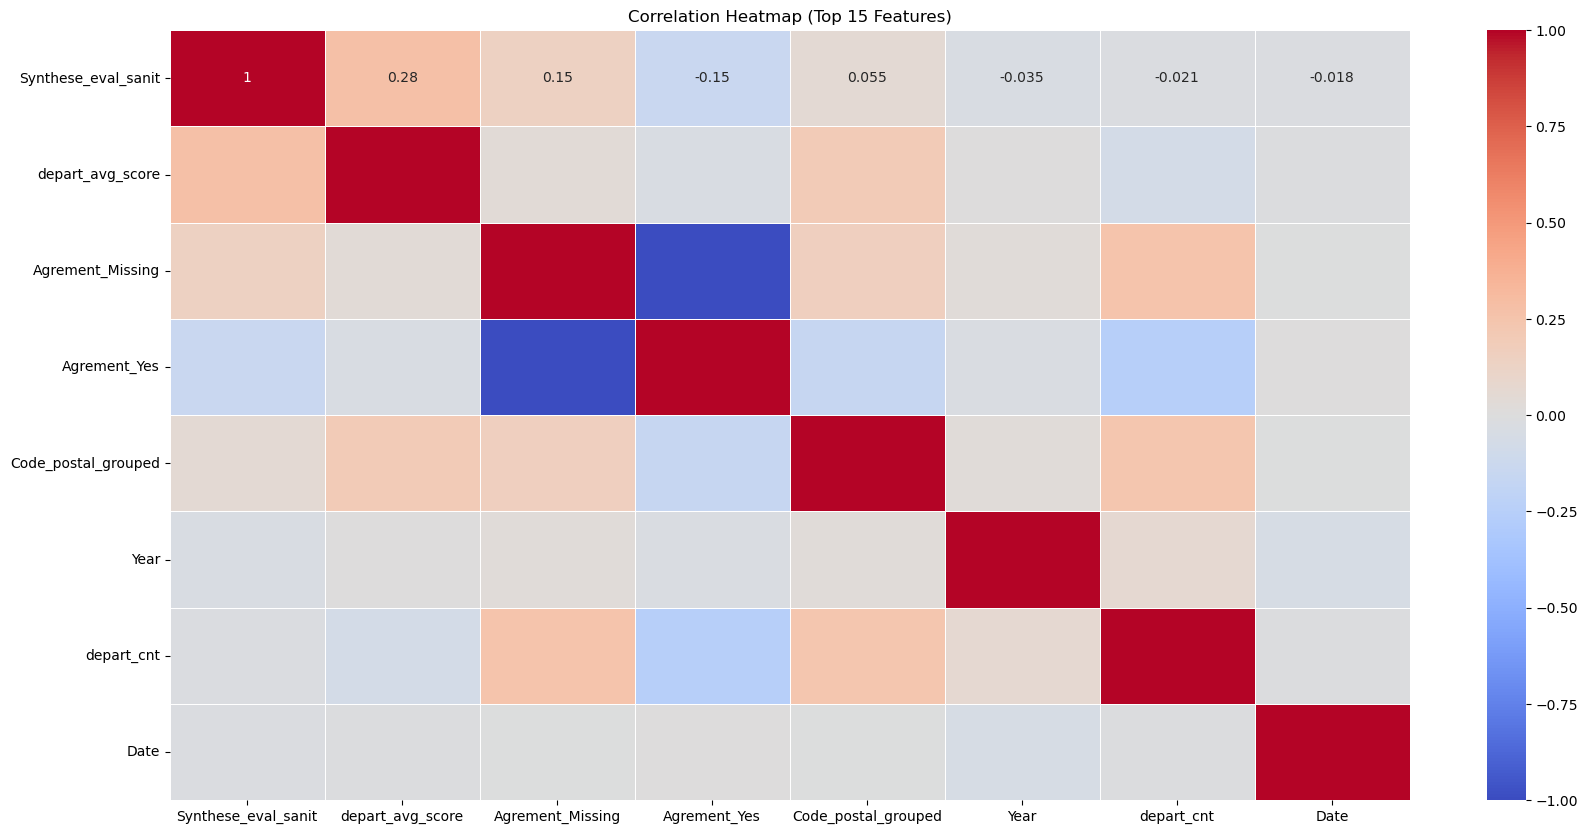

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix using the Pearson method
correlation_matrix_pearson = data_numerical_pearson.corr(method='pearson')

# Get the top correlated features with the target variable
top_features = correlation_matrix_pearson['Synthese_eval_sanit'].abs().sort_values(ascending=False).head(15).index

# Filter the correlation matrix to include only the top correlated features
correlation_matrix_top = correlation_matrix_pearson.loc[top_features, top_features]

# Plot the correlation heatmap for the top features
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix_top, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Top 15 Features)")
plt.show()




In [48]:
target_correlation = data_numerical_pearson.corr()['Synthese_eval_sanit'].abs().sort_values(ascending=False)

# Extract top 3 correlated features from target_correlation
top_features_target = target_correlation.head(4).index

# Extract top 15 correlated features from correlation_matrix_pearson
top_features_pearson = correlation_matrix_pearson['Synthese_eval_sanit'].abs().sort_values(ascending=False).head(4).index
top_features_pearson

Index(['Synthese_eval_sanit', 'depart_avg_score', 'Agrement_Missing',
       'Agrement_Yes'],
      dtype='object')

In [49]:
data_numerical_pearson['Synthese_eval_sanit'].unique()

array([ 2.,  1.,  3.,  4., nan])

In [50]:
data_numerical_pearson = data_numerical_pearson.drop(columns=['Synthese_eval_sanit'])

In [51]:
data_numerical_pearson

,Code_postal_grouped,Year,Date,Agrement_Missing,Agrement_Yes,depart_avg_score,depart_cnt
0,33.0,2024,5,True,False,1.892655,354
1,93.0,2023,17,True,False,1.898331,659
2,20.0,2023,8,True,False,1.369193,409
3,50.0,2023,15,False,True,1.554140,157
4,20.0,2023,21,True,False,1.369193,409
...,...,...,...,...,...,...,...
31505,83.0,2024,2,True,False,1.592068,353
31506,83.0,2024,6,True,False,1.592068,353
31507,94.0,2024,9,True,False,1.662873,703
31508,94.0,2024,8,True,False,1.662873,703


In [52]:
data_numerical_pearson.isna().sum()

Code_postal_grouped    0
Year                   0
Date                   0
Agrement_Missing       0
Agrement_Yes           0
depart_avg_score       0
depart_cnt             0
dtype: int64

# Transforming Categorical

In [53]:
data_categorical

,Libelle_commune,APP_Libelle_activite_etablissement,filtre,ods_type_activite,Synthese_eval_sanit,Numero_inspection
0,Bègles,Restaurant,Restaurant,Autres,Satisfaisant,23-110093-1
1,Villemomble,Libre service|Alimentation générale,Libre service|Alimentation générale,Autres,Satisfaisant,23-056603-1
2,Lucciana,Restaurant,Restaurant,Autres,Très satisfaisant,23-018114-1
3,Saint-Vaast-la-Hougue,Purification/Expédition de coquillages,NaN,Produits de la mer et d'eau douce,Satisfaisant,23-011747-1
4,Partinello,Producteur fermier,Producteur fermier,Autres,Très satisfaisant,23-097885-1
...,...,...,...,...,...,...
31505,Le Thoronet,Restauration collective,Restauration collective,Autres,NaN,24-009071-1
31506,Le Thoronet,Restaurant,Restaurant,Autres,NaN,24-009093-1
31507,Villeneuve-le-Roi,Restauration collective,Restauration collective,Autres,NaN,24-009176-1
31508,Maisons-Alfort,Restauration collective,Restauration collective,Autres,NaN,24-009213-1


In [54]:
pd.DataFrame({'Type':data_categorical.dtypes, 'Missing':data_categorical.isna().sum(), "Cnt_unique":data_categorical.nunique()})

,Type,Missing,Cnt_unique
Libelle_commune,object,0,8359
APP_Libelle_activite_etablissement,object,0,148
filtre,object,8102,96
ods_type_activite,object,0,7
Synthese_eval_sanit,object,8839,4
Numero_inspection,object,0,31510


In [55]:
print(data_categorical['ods_type_activite'].unique())


['Autres' "Produits de la mer et d'eau douce" 'Viandes et produits carnés'
 'Transport et entreposage de denrées alimentaires'
 'Lait et produits laitiers' 'Abattoirs' '\x8cufs et ovoproduits']


In [56]:
data_categorical['filtre'] = data_categorical['filtre'].str.split('|').str[0]
data_categorical['APP_Libelle_activite_etablissement'] = data_categorical['APP_Libelle_activite_etablissement'].str.split('|').str[0]

In [57]:
data_categorical['filtre'] = data_categorical['filtre'].replace({
    'Alimentation gÃ©nÃ©rale': 'Alimentation générale',
    'Boulangerie-PÃ¢tisserie': 'Boulangerie-Pâtisserie',
    'Rayon pain/viennoiserie/pÃ¢tisserie': 'Rayon pain_viennoiserie_pâtisserie',
    # 
})


data_categorical['ods_type_activite'] = data_categorical['ods_type_activite'].replace({
    'Viandes et produits carnÃ©s': 'Viandes et produits carnÃ©s',
    'Transport et entreposage de denrÃ©es alimentaires': 'Transport et entreposage de denraces alimentaires',
    'Å\x92ufs et ovoproduits':'oufs et ovoproduits'
    # 
})




In [58]:
data_categorical['Synthese_eval_sanit'] = data_categorical['Synthese_eval_sanit'].replace({
    'TrÃ¨s satisfaisant': 'Très satisfaisant',
    'A amÃ©liorer': 'A améliorer',
    'A corriger de maniÃ¨re urgente': 'A corriger de manière urgente'
})



In [59]:
# Replace NaN values with 'Missing'
data_categorical['filtre'] = data_categorical['filtre'].replace(np.nan, 'Missing')


In [60]:
print(data_categorical['filtre'].unique())


['Restaurant' 'Libre service' 'Missing' 'Producteur fermier'
 'Restauration collective' 'Boulangerie-Pâtisserie'
 'Boucherie-Charcuterie' 'Traiteur' 'Poissonnerie' 'Fromagerie'
 'Rayon poissonnerie' 'Alimentation générale' 'Chocolatier'
 'Rayon boucherie-charcuterie' 'Glacier' 'Rayon fromagerie'
 'Rayon pain/viennoiserie/pâtisserie' 'Rayon traiteur' 'Primeur']


In [61]:
data_categorical.columns

Index(['Libelle_commune', 'APP_Libelle_activite_etablissement', 'filtre',
       'ods_type_activite', 'Synthese_eval_sanit', 'Numero_inspection'],
      dtype='object')

In [62]:
# Filter the dataframe where 'filtre' column is 'Missing'
missing_filtre_df = data_categorical[data_categorical['filtre'] == 'Missing']

# Print the filtered dataframe
data_categorical



,Libelle_commune,APP_Libelle_activite_etablissement,filtre,ods_type_activite,Synthese_eval_sanit,Numero_inspection
0,Bègles,Restaurant,Restaurant,Autres,Satisfaisant,23-110093-1
1,Villemomble,Libre service,Libre service,Autres,Satisfaisant,23-056603-1
2,Lucciana,Restaurant,Restaurant,Autres,Très satisfaisant,23-018114-1
3,Saint-Vaast-la-Hougue,Purification/Expédition de coquillages,Missing,Produits de la mer et d'eau douce,Satisfaisant,23-011747-1
4,Partinello,Producteur fermier,Producteur fermier,Autres,Très satisfaisant,23-097885-1
...,...,...,...,...,...,...
31505,Le Thoronet,Restauration collective,Restauration collective,Autres,NaN,24-009071-1
31506,Le Thoronet,Restaurant,Restaurant,Autres,NaN,24-009093-1
31507,Villeneuve-le-Roi,Restauration collective,Restauration collective,Autres,NaN,24-009176-1
31508,Maisons-Alfort,Restauration collective,Restauration collective,Autres,NaN,24-009213-1


In [63]:
# Define a function to extract the first word from a string
def get_first_word(s):
    return s.split()[0]

# Apply the function to the 'ods_type_activite' column and use it to fill the 'Missing' values in the 'filtre' column
data_categorical.loc[data_categorical['filtre'] == 'Missing', 'filtre'] = data_categorical[data_categorical['filtre'] == 'Missing']['ods_type_activite'].apply(get_first_word)

In [64]:
print(data_categorical[data_categorical['filtre'] == 'Missing'])

Empty DataFrame
Columns: [Libelle_commune, APP_Libelle_activite_etablissement, filtre, ods_type_activite, Synthese_eval_sanit, Numero_inspection]
Index: []


In [65]:
data_categorical.columns

Index(['Libelle_commune', 'APP_Libelle_activite_etablissement', 'filtre',
       'ods_type_activite', 'Synthese_eval_sanit', 'Numero_inspection'],
      dtype='object')

In [66]:
# Drop the specified columns
data_categorical = data_categorical.drop(['Libelle_commune', 'APP_Libelle_activite_etablissement', 'ods_type_activite'], axis=1)

# Perform one-hot encoding on the 'filtre' column
data_categorical = pd.get_dummies(data_categorical, columns=['filtre'])


In [67]:
data_categorical

,Synthese_eval_sanit,Numero_inspection,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs
0,Satisfaisant,23-110093-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,Satisfaisant,23-056603-1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Très satisfaisant,23-018114-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,Satisfaisant,23-011747-1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,Très satisfaisant,23-097885-1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,NaN,24-009071-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
31506,NaN,24-009093-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
31507,NaN,24-009176-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
31508,NaN,24-009213-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [68]:
pd.DataFrame({'Type':data_categorical.dtypes, 'Missing':data_categorical.isna().sum(), "Cnt_unique":data_categorical.nunique()})

,Type,Missing,Cnt_unique
Synthese_eval_sanit,object,8839,4
Numero_inspection,object,0,31510
filtre_Abattoirs,bool,0,2
filtre_Alimentation générale,bool,0,2
filtre_Autres,bool,0,2
filtre_Boucherie-Charcuterie,bool,0,2
filtre_Boulangerie-Pâtisserie,bool,0,2
filtre_Chocolatier,bool,0,2
filtre_Fromagerie,bool,0,2
filtre_Glacier,bool,0,2


In [69]:
pd.DataFrame({'Type':data_numerical.dtypes, 'Missing':data_numerical.isna().sum(), "Cnt_unique":data_numerical.nunique()})

,Type,Missing,Cnt_unique
Numero_inspection,object,0,31510
Synthese_eval_sanit,float64,8839,4
Code_postal_grouped,float64,0,89
Year,int32,0,2
Month,int32,0,12
Date,int32,0,31
Agrement_Missing,bool,0,2
Agrement_Yes,bool,0,2
department,float64,0,89
depart_10.0,bool,0,2


In [70]:
# Join the data_categorical and data_numerical DataFrames on 'Numero_inspection'
data_base = pd.merge(data_categorical, data_numerical, on='Numero_inspection')



In [71]:
# Print the first few rows of the joined DataFrame
data_base.head()


,Synthese_eval_sanit_x,Numero_inspection,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Synthese_eval_sanit_y,Code_postal_grouped,Year,Month,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,...,depart_50.0,depart_51.0,depart_52.0,depart_53.0,depart_54.0,depart_55.0,depart_56.0,depart_57.0,depart_58.0,depart_59.0,depart_60.0,depart_61.0,depart_62.0,depart_63.0,depart_64.0,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score
0,Satisfaisant,23-110093-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2.0,33.0,2024,2,5,True,False,33.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,354,1.892655
1,Satisfaisant,23-056603-1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,93.0,2023,7,17,True,False,93.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,659,1.898331
2,Très satisfaisant,23-018114-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1.0,20.0,2023,3,8,True,False,20.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,409,1.369193
3,Satisfaisant,23-011747-1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2.0,50.0,2023,2,15,False,True,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,157,1.554140
4,Très satisfaisant,23-097885-1,False,False,False,False,False,False,False,False,False,False,False,False,True,

In [72]:
data_base.shape


(31510, 125)

# Creating additional dummy variables for 
1. Code_postal_grouped
2. Year
3. Month

In [74]:
# Create dummy variables
# Perform one-hot encoding on the 'filtre' column
data_base = pd.get_dummies(data_base, columns=['Code_postal_grouped'])
data_base = pd.get_dummies(data_base, columns=['Month'])
data_base = pd.get_dummies(data_base, columns=['Year'])

In [75]:
data_base.isna().sum()

Synthese_eval_sanit_x                        8839
Numero_inspection                               0
filtre_Abattoirs                                0
filtre_Alimentation générale                    0
filtre_Autres                                   0
filtre_Boucherie-Charcuterie                    0
filtre_Boulangerie-Pâtisserie                   0
filtre_Chocolatier                              0
filtre_Fromagerie                               0
filtre_Glacier                                  0
filtre_Lait                                     0
filtre_Libre service                            0
filtre_Poissonnerie                             0
filtre_Primeur                                  0
filtre_Producteur fermier                       0
filtre_Produits                                 0
filtre_Rayon boucherie-charcuterie              0
filtre_Rayon fromagerie                         0
filtre_Rayon pain/viennoiserie/pâtisserie       0
filtre_Rayon poissonnerie                       0


In [76]:
data_base.shape

(31510, 225)

In [77]:
data_base

,Synthese_eval_sanit_x,Numero_inspection,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Synthese_eval_sanit_y,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,...,Code_postal_grouped_62.0,Code_postal_grouped_63.0,Code_postal_grouped_64.0,Code_postal_grouped_65.0,Code_postal_grouped_66.0,Code_postal_grouped_67.0,Code_postal_grouped_68.0,Code_postal_grouped_69.0,Code_postal_grouped_70.0,Code_postal_grouped_71.0,Code_postal_grouped_72.0,Code_postal_grouped_73.0,Code_postal_grouped_74.0,Code_postal_grouped_75.0,Code_postal_grouped_76.0,Code_postal_grouped_77.0,Code_postal_grouped_78.0,Code_postal_grouped_79.0,Code_postal_grouped_80.0,Code_postal_grouped_81.0,Code_postal_grouped_82.0,Code_postal_grouped_83.0,Code_postal_grouped_84.0,Code_postal_grouped_85.0,Code_postal_grouped_86.0,Code_postal_grouped_87.0,Code_postal_grouped_88.0,Code_postal_grouped_89.0,Code_postal_grouped_90.0,Code_postal_grouped_91.0,Code_postal_grouped_92.0,Code_postal_grouped_93.0,Code_postal_grouped_94.0,Code_postal_grouped_95.0,Code_postal_grouped_97.0,Code_postal_grouped_98.0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2023,Year_2024
0,Satisfaisant,23-110093-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2.0,5,True,False,33.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,Satisfaisant,23-056603-1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,17,True,False,93.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,Très satisfaisant,23-018114-1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1.0,8,True,False,20.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,Satisfaisant,23-011747-1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2.0,15,False,True,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

# Done with preprocessing

# Visualisations

In [78]:

# fonction de recodage
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

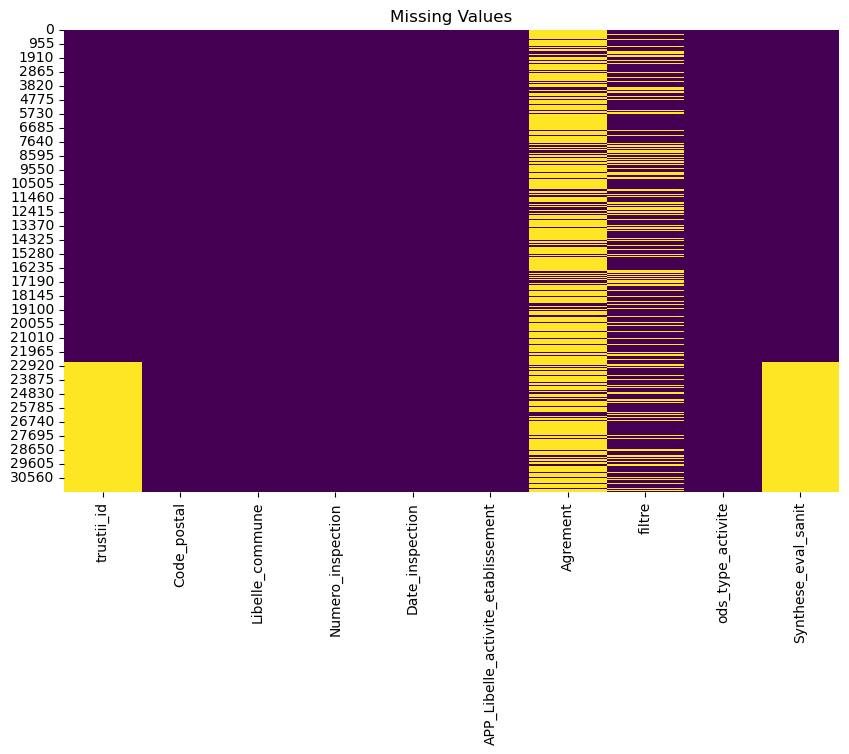

In [79]:
# 1. Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

C:\Users\Source\AppData\Local\Temp\ipykernel_27548\3517578906.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data.Synthese_eval_sanit)
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types

Synthese_eval_sanit
Satisfaisant         0.573817
Très satisfaisant    0.362842
A améliorer          0.063341
Name: proportion, dtype: float64


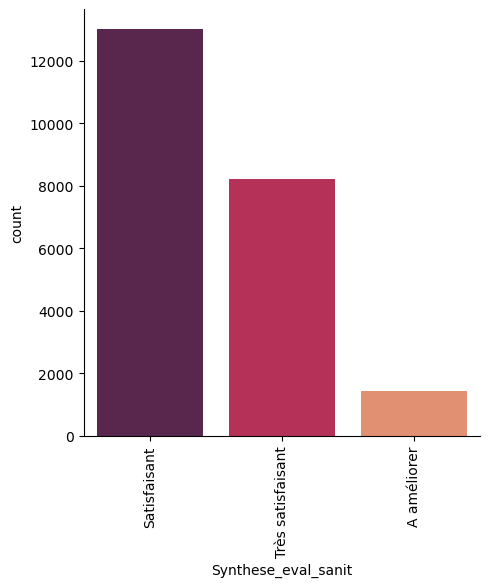

In [80]:
pd.value_counts(data.Synthese_eval_sanit)
data['Synthese_eval_sanit'] = coding(data['Synthese_eval_sanit'], 
                                             {'A corriger de manière urgente':'A améliorer'})
sns.catplot(x = 'Synthese_eval_sanit', 
            kind = 'count', palette="rocket", data = data).set_xticklabels(rotation=90) 

print(data['Synthese_eval_sanit'].value_counts(normalize = True))

c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


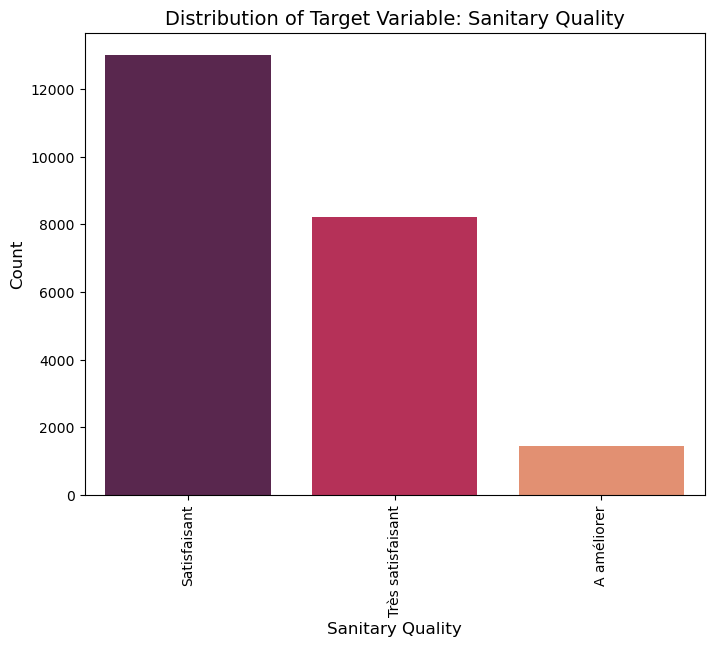

In [81]:

# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Synthese_eval_sanit', data=data, palette='rocket')
plt.title('Distribution of Target Variable: Sanitary Quality', fontsize=14)
plt.xlabel('Sanitary Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()


c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


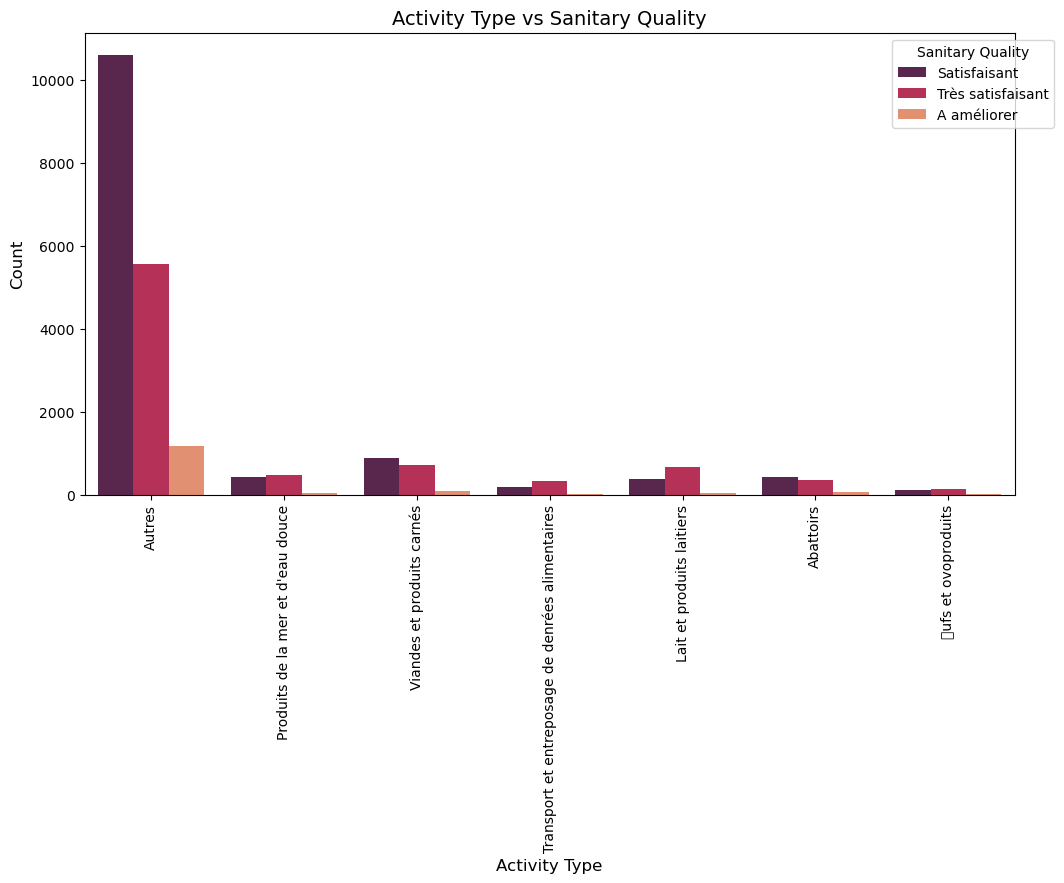

In [82]:

# Activity Type vs Sanitary Quality
plt.figure(figsize=(12, 6))
sns.countplot(x='ods_type_activite', hue='Synthese_eval_sanit', data=data, palette='rocket')
plt.title('Activity Type vs Sanitary Quality', fontsize=14)
plt.xlabel('Activity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sanitary Quality', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.show()


c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


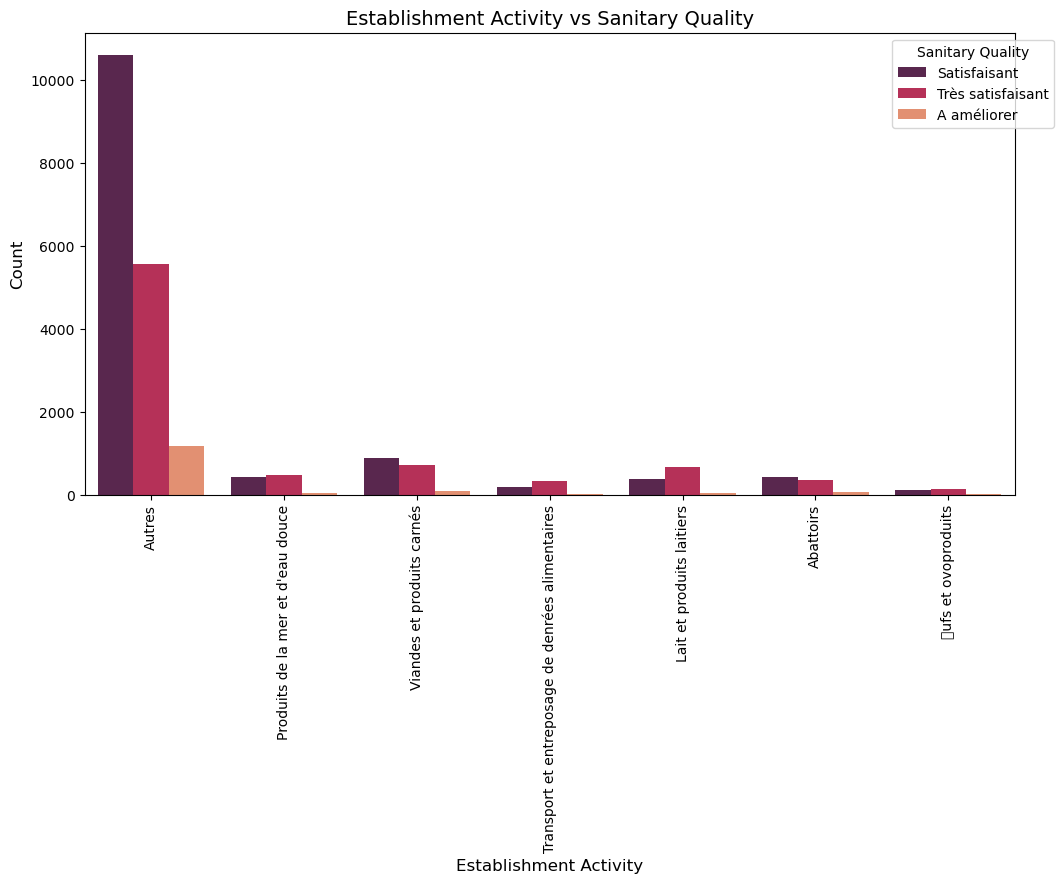

In [83]:

# Establishment Activity vs Sanitary Quality
plt.figure(figsize=(12, 6))
sns.countplot(x='ods_type_activite', hue='Synthese_eval_sanit', data=data, palette='rocket')
plt.title('Establishment Activity vs Sanitary Quality', fontsize=14)
plt.xlabel('Establishment Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sanitary Quality', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.show()


c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Source\.conda\envs\py\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


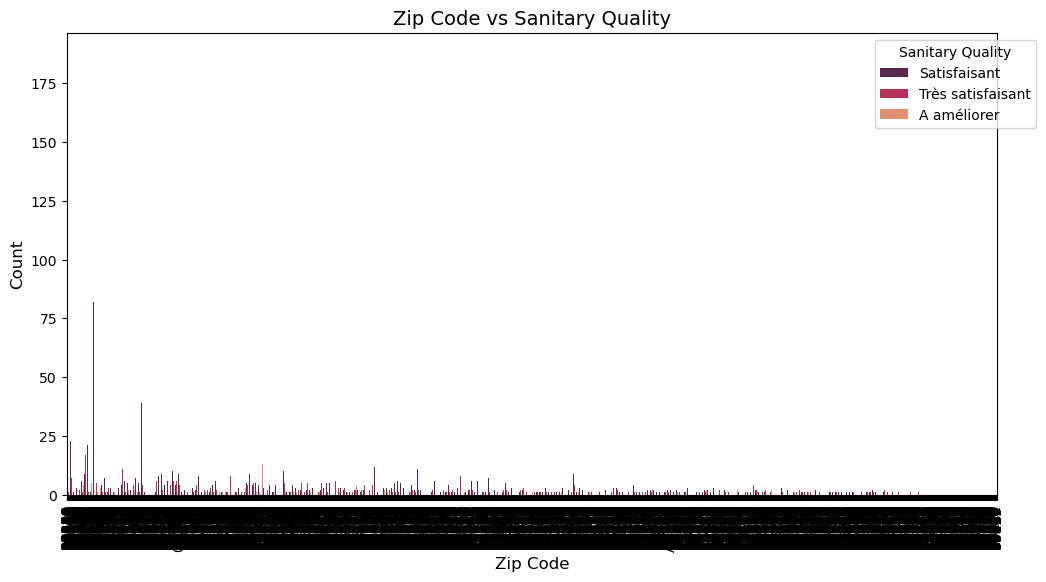

In [84]:
# Zip Code vs Sanitary Quality
plt.figure(figsize=(12, 6))
sns.countplot(x='Code_postal', hue='Synthese_eval_sanit', data=data, palette='rocket')
plt.title('Zip Code vs Sanitary Quality', fontsize=14)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sanitary Quality', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.show()

In [87]:
data_base.drop(columns=['Numero_inspection'], inplace=True)

In [88]:
cols_to_drop = data_base.filter(like='Code_postal_').columns
data_base.drop(columns=cols_to_drop, inplace=True)

In [89]:
data_base

,Synthese_eval_sanit_x,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Synthese_eval_sanit_y,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,depart_28.0,...,depart_64.0,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2023,Year_2024
0,Satisfaisant,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,2.0,5,True,False,33.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,354,1.892655,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,Satisfaisant,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2.0,17,True,False,93.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,659,1.898331,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,Très satisfaisant,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1.0,8,True,False,20.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,409,1.369193,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,Satisfaisant,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2.0,15,False,True,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,157,1.554140,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Très satisfaisant,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Fal

In [107]:
data_base.to_csv('data.csv', index=False)

# creating test and train

In [90]:
# Convert boolean columns to 0 and 1
boolean_columns = data_base.select_dtypes(include='bool').columns
for column in boolean_columns:
    data_base[column] = data_base[column].astype(int)

In [91]:
df_test = data_base[data_base['Synthese_eval_sanit_x'].isna()]

In [92]:
test_id

,trustii_id
0,5883
1,118
2,3156
3,4577
4,6998
...,...
8834,5401
8835,5150
8836,5732
8837,2999


In [93]:
df_test['trustii_id'] = test_id['trustii_id'].values# Add back the test_id

C:\Users\Source\AppData\Local\Temp\ipykernel_27548\2556350787.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['trustii_id'] = test_id['trustii_id'].values# Add back the test_id


In [94]:
df_test

,Synthese_eval_sanit_x,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Synthese_eval_sanit_y,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,depart_28.0,...,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2023,Year_2024,trustii_id
22671,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,14,1,0,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,134,1.701493,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5883
22672,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,21,1,0,92.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,340,2.073529,0,0,1,0,0,0,0,0,0,0,0,0,1,0,118
22673,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,21,1,0,74.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,1.557940,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3156
22674,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,17,1,0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,2.089202,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4577
22675,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,22,1,0,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,322,1.540373,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,2,1,0,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,353,1.592068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5401
31506,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,6,1,0,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,353,1.592068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5150
31507,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,9,1,0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,703,1.662873,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5732
31508,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,8,1,0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,703,1.662873,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2999


In [95]:
df_test = df_test.drop('Synthese_eval_sanit_x', axis=1) # Drop the DV

Create Treain

In [96]:
df_train = data_base[data_base['Synthese_eval_sanit_x'].notna()]


# Post Processing

In [97]:
df_train.drop(columns=['Synthese_eval_sanit_y'], inplace=True)
df_test.drop(columns=['Synthese_eval_sanit_y'], inplace=True)

In [98]:
df_train['Synthese_eval_sanit_x'] = df_train['Synthese_eval_sanit_x'].replace({
     "A corriger de maniÃ¨re urgente": 4,
    'A corriger de manière urgente':4,
    "A améliorer": 3,
    "Satisfaisant": 2,
    "Très satisfaisant": 1
})

In [99]:
print(df_train.shape)
print(df_test.shape)

(22671, 134)
(8839, 134)


# Modeling_ adding

In [100]:
df_train

,Synthese_eval_sanit_x,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,depart_28.0,depart_29.0,...,depart_64.0,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2023,Year_2024
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,1,0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,354,1.892655,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1,0,93.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,659,1.898331,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,1,0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,409,1.369193,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15,0,1,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,1.554140,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,1,0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,409,1.369193,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22666,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14,1,0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,703,1.662873,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22667,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,1,0,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3595,1.668150,0,0,0,0,1,0,0,0,0,0,0,0,1,0
22668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,1,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,1.740000,0,0,0,0,0,1,0,0,0,0,0,0,1,0
22669,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,16,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1289,1.695888,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [101]:
df_test

,filtre_Abattoirs,filtre_Alimentation générale,filtre_Autres,filtre_Boucherie-Charcuterie,filtre_Boulangerie-Pâtisserie,filtre_Chocolatier,filtre_Fromagerie,filtre_Glacier,filtre_Lait,filtre_Libre service,filtre_Poissonnerie,filtre_Primeur,filtre_Producteur fermier,filtre_Produits,filtre_Rayon boucherie-charcuterie,filtre_Rayon fromagerie,filtre_Rayon pain/viennoiserie/pâtisserie,filtre_Rayon poissonnerie,filtre_Rayon traiteur,filtre_Restaurant,filtre_Restauration collective,filtre_Traiteur,filtre_Transport,filtre_Viandes,filtre_ufs,Date,Agrement_Missing,Agrement_Yes,department,depart_10.0,depart_11.0,depart_12.0,depart_13.0,depart_14.0,depart_15.0,depart_16.0,depart_17.0,depart_18.0,depart_19.0,depart_20.0,depart_21.0,depart_22.0,depart_23.0,depart_24.0,depart_25.0,depart_26.0,depart_27.0,depart_28.0,depart_29.0,depart_30.0,...,depart_65.0,depart_66.0,depart_67.0,depart_68.0,depart_69.0,depart_70.0,depart_71.0,depart_72.0,depart_73.0,depart_74.0,depart_75.0,depart_76.0,depart_77.0,depart_78.0,depart_79.0,depart_80.0,depart_81.0,depart_82.0,depart_83.0,depart_84.0,depart_85.0,depart_86.0,depart_87.0,depart_88.0,depart_89.0,depart_90.0,depart_91.0,depart_92.0,depart_93.0,depart_94.0,depart_95.0,depart_97.0,depart_98.0,depart_cnt,depart_avg_score,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2023,Year_2024,trustii_id
22671,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,0,91.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,134,1.701493,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5883
22672,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1,0,92.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,340,2.073529,0,0,1,0,0,0,0,0,0,0,0,0,1,0,118
22673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,1,0,74.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,233,1.557940,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3156
22674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,17,1,0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,2.089202,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4577
22675,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,1,0,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,322,1.540373,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,353,1.592068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5401
31506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1,0,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,353,1.592068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5150
31507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,1,0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,703,1.662873,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5732
31508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,703,1.662873,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2999


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define independent and dependent variables
X_train = df_train.drop(['Synthese_eval_sanit_x'], axis=1)
y_train = df_train['Synthese_eval_sanit_x']
X_test = df_test.drop(['trustii_id'], axis=1)

# Split the training dataset for model evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_split)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict using the best estimator
y_pred = best_estimator.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Predict on test dataset
test_predictions = best_estimator.predict(X_test_scaled)

# Add predictions to test dataset
df_test['Synthese_eval_sanit_x_predicted'] = test_predictions



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Validation Accuracy: 0.6549062844542448


C:\Users\Source\AppData\Local\Temp\ipykernel_27548\3029662526.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['Synthese_eval_sanit_x_predicted'] = test_predictions


In [106]:
# Get the column names for feature importances
feature_names = X_train.columns

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Sort features by importance from highest to lowest
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Print feature importances with variable names sorted from highest to lowest importance
print("Feature Importances (from highest to lowest):")
for name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{name}: {importance}")

Feature Importances (from highest to lowest):
depart_avg_score: 0.15251625983709383
Date: 0.12595307651169774
department: 0.05201450214919042
depart_cnt: 0.04920980132563263
filtre_Restaurant: 0.03555007384156042
Agrement_Missing: 0.033155126917489994
Agrement_Yes: 0.0242008714846888
filtre_Restauration collective: 0.02109070029104968
filtre_Producteur fermier: 0.018913002209139648
filtre_Lait: 0.018746481426241322
depart_20.0: 0.017109978523543526
filtre_Transport: 0.016078982052322013
Month_12: 0.01595199697042776
Month_10: 0.014971033649934271
Month_11: 0.014617533972827567
Month_6: 0.012770914520255621
filtre_Libre service: 0.012431545828048595
Month_3: 0.011709512569603715
Month_9: 0.011425840446046132
Month_7: 0.011305627610931313
Month_8: 0.011303171615144499
Month_2: 0.011093996435629899
Month_5: 0.010630826691753128
Month_4: 0.010299400227015046
Year_2023: 0.009820543629078943
Year_2024: 0.009340589780472967
filtre_Produits: 0.007987151245432943
depart_75.0: 0.0079518108800735

In [521]:
desired_columns = df_test[['trustii_id', 'Synthese_eval_sanit_x_predicted']]
desired_columns

,trustii_id,Synthese_eval_sanit_x_predicted
22671,5883,2
22672,118,2
22673,3156,2
22674,4577,2
22675,6998,1
...,...,...
31505,5401,1
31506,5150,1
31507,5732,1
31508,2999,1


Do this after the basetable is ready later

In [522]:
desired_columns.to_csv('/kaggle/working/table.csv', index=False)
# Create a link to download the dataframe
from IPython.display import FileLink
FileLink('table.csv')


/kaggle/working/table.csv

Reference:
    https://github.com/olivierviollet/Studies/blob/master/alim_confiance_vf.ipynb